In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 08 Apr 2021 08:34


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,492,905","23,428,437","-2,064,468",-8.10%
Collector,"4,354,106","3,583,586","-770,520",-17.70%
Freeway,"28,027,151","27,908,269","-118,882",-0.42%
Ramp,"621,158","495,088","-126,070",-20.30%
Total,"58,495,320","55,415,380","-3,079,940",-5.27%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,197,408","30,203,782","-993,626",-3.18%
Kitsap,"4,477,678","3,633,043","-844,635",-18.86%
Pierce,"13,429,731","12,539,797","-889,934",-6.63%
Snohomish,"9,390,503","9,038,758","-351,745",-3.75%
Total,"58,495,320","55,415,380","-3,079,940",-5.27%


----
### Daily | Scatterplots 

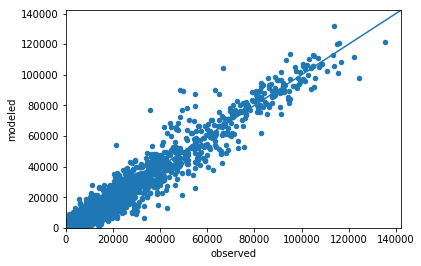

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9685616824281867


---
By County

King r^2: 0.9757182495234832
Kitsap r^2: 0.9562061288936183
Pierce r^2: 0.9576136394210337
Snohomish r^2: 0.9609492202797482


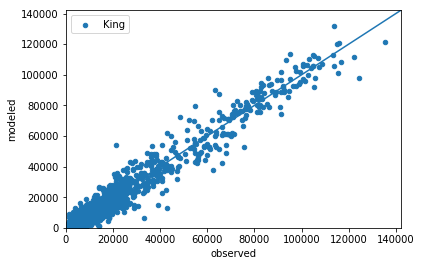

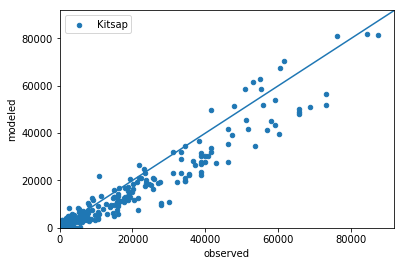

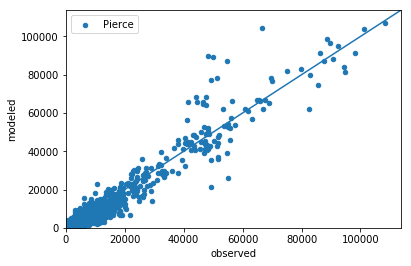

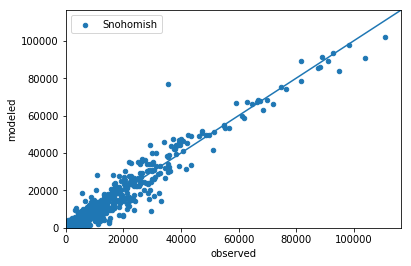

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9403549557531274
r^2 Arterial: 0.8808046132054513


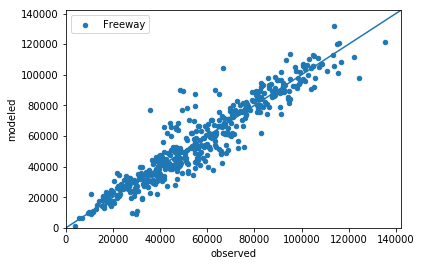

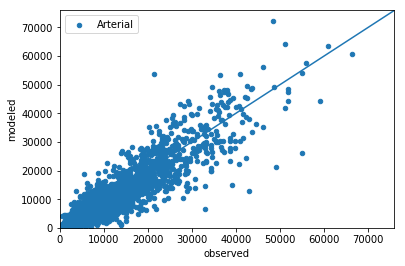

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9200115265830788


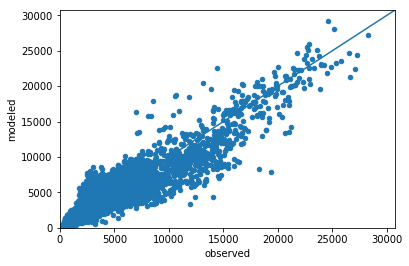

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","551,046",King,"-17,371",-3.06%
1,KENT,"550,322","518,540",King,"-31,782",-5.78%
2,SEATTLE - SOUTH OF CBD,"526,500","511,937",King,"-14,563",-2.77%
3,SHIP CANAL,"519,802","550,639",King,"30,837",5.93%
4,KIRKLAND-REDMOND,"414,120","396,787",King,"-17,333",-4.19%
5,MILL CREEK,"400,848","398,965",King,"-1,883",-0.47%
6,SOUTH BELLEVUE,"399,500","359,250",King,"-40,250",-10.08%
7,SEATTLE - NORTH,"372,000","373,815",King,"1,815",0.49%
8,TACOMA - EAST OF CBD,"312,164","335,833",Pierce,"23,669",7.58%
9,PARKLAND,"304,322","283,388",Pierce,"-20,934",-6.88%


r^2 : 0.9938243719308969


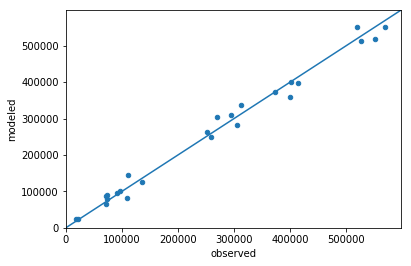

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","398,970","6,276",1.60%
5,Sound Transit,"145,426","154,237","8,811",6.06%
0,Community Transit,"30,918","33,717","2,799",9.05%
4,Pierce Transit,"27,233","34,399","7,166",26.31%
6,Washington Ferries,"16,912","12,489","-4,423",-26.15%
3,Kitsap Transit,"7,638","11,176","3,537",46.31%
1,Everett Transit,"3,290","1,871","-1,420",-43.14%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",751,-604,-44.58%
1,POF Seattle - Vashon,670,278,-392,-58.51%
2,WSF Kingston - Edmon,"1,732",176,"-1,556",-89.85%
3,WSF Bainbridge Islan,"8,857","7,786","-1,070",-12.08%
4,POF Bremerton - Seat,"4,484","3,590",-894,-19.94%
5,WSF Fauntleroy - Sou,365,19,-346,-94.80%
6,WSF Vashon Island -,946,397,-549,-58.02%
7,WSF Southworth - Vas,239,230,-9,-3.58%
8,WSF Point Defiance -,289,290,2,0.57%


r^2 : 0.9870556843699025


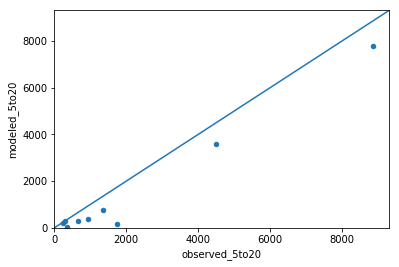

In [16]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
7,5005,WSF Vashon Island -,311
8,5006,WSF Southworth - Vas,220
9,5007,WSF Point Defiance -,190
5,5002,WSF Bainbridge Islan,179
4,5001,WSF Kingston - Edmon,150
6,5003,WSF Bremerton - Seat,45
2,4201,POF Bremerton - Pt O,23
3,4202,POF Bremerton - Anna,23
0,1973,POF West Seattle - S,0
1,1975,POF Vashon Island -,0


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","71,990","2,607",3.76%
1,Sounder South,"15,356","14,276","-1,080",-7.03%
2,Sounder North,"1,667","1,859",192,11.50%


r^2 : 0.9996702757834363


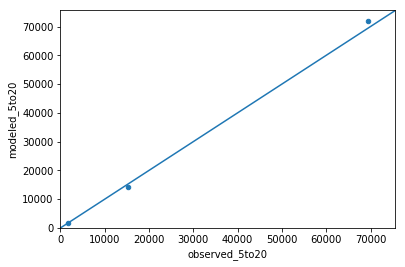

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","15,472",136,0.88%
4,C Line RapidRide,"11,368","12,012",644,5.67%
1,KC Metro 40,"11,405","12,001",596,5.22%
10,Sound Transit 550,"9,168","10,584","1,417",15.45%
0,KC Metro 7,"10,150","10,203",53,0.53%
5,D Line RapidRide,"13,078","9,500","-3,578",-27.36%
2,A Line RapidRide,"8,522","8,493",-29,-0.34%
7,F Line RapidRide,"5,267","7,233","1,966",37.32%
3,B Line RapidRide,"5,914","5,701",-213,-3.61%
8,SLU Streetcar,"1,703","1,432",-271,-15.92%


r^2 : 0.9325815054086626


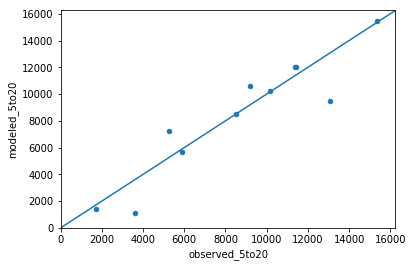

In [21]:
ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8858745711414441
r^2 Everett Transit: -0.38302202480063785


r^2 King County Metro: 0.9357151792190469
r^2 Kitsap Transit: 0.640682288059506
r^2 Pierce Transit: 0.8623313750015819
r^2 Sound Transit: 0.9974670156981441
r^2 Washington Ferries: 0.9864964074658391


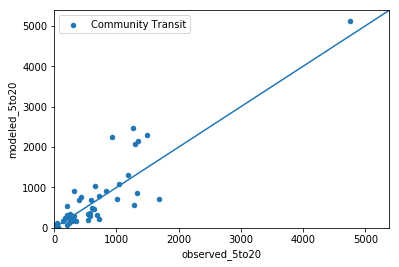

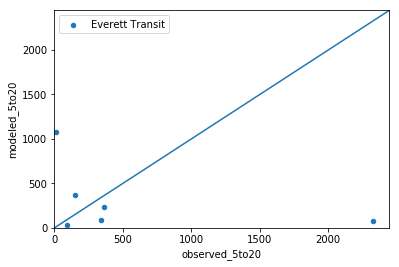

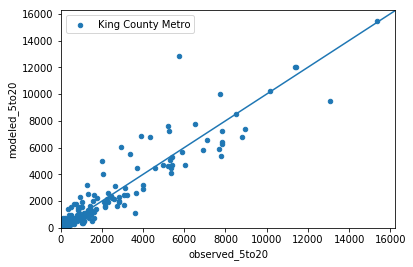

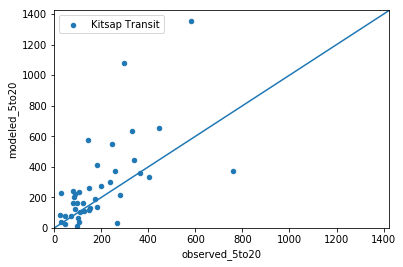

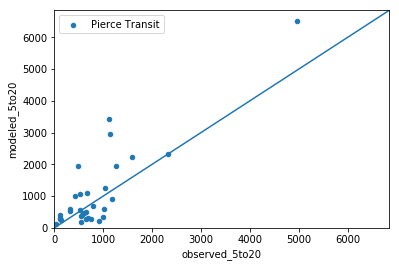

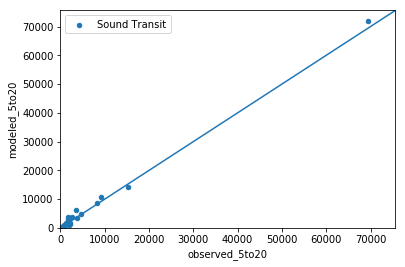

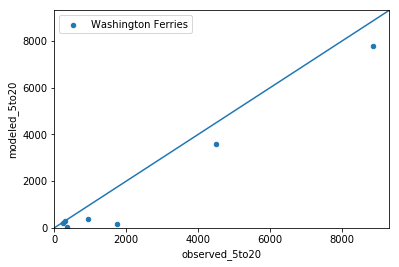

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","10,370",955,10.14%
Westlake,"10,904","7,671","-3,233",-29.65%
University St,"5,257","6,078",821,15.62%
Pioneer Square,"3,865","5,877","2,012",52.07%
Int'l District,"5,647","3,439","-2,209",-39.11%
Capitol Hill,"7,016","7,329",313,4.46%
Stadium,"1,912",864,"-1,048",-54.81%
SODO,"2,108","3,474","1,367",64.84%
Beacon Hill,"2,587","2,158",-429,-16.59%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","10,370",955,10.14%
Capitol Hill,"7,016","7,329",313,4.46%
Westlake/University St,"16,161","13,749","-2,412",-14.92%
Pioneer Square/Int'l District,"9,512","9,316",-196,-2.06%
Stadium/SODO,"4,020","4,338",319,7.92%
Beacon Hill/Mount Baker,"4,809","4,579",-231,-4.79%
Columbia City,"2,376","2,527",151,6.34%
Othello/Rainier Beach,"4,412","5,655","1,243",28.17%
Tukwila Int'l Blvd,"2,779","3,288",509,18.31%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.30,-99.00,99.30,-100.30%
Westlake,0.42,0.36,0.06,16.44%
University St,0.59,0.20,0.39,196.55%
Pioneer Square,0.53,0.16,0.37,232.00%
Int'l District,0.71,0.45,0.26,58.79%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.30,0.12,0.18,152.99%
SODO,0.45,0.31,0.14,45.01%
Beacon Hill,0.35,0.35,-0.00,-1.38%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","133,642","3,642",2.80%
I-5 to Mount Vernon,3744,Snohomish,"67,000","60,206","-6,794",-10.14%
I-90 @ Snoqualmie Pass,3739,King,"33,000","30,635","-2,365",-7.17%
SR-532 to Camano Island,3746,Snohomish,"23,000","20,907","-2,093",-9.10%
SR-507 to Yelm,3734,Pierce,"23,000","20,753","-2,247",-9.77%
SR-3 to Belfair,3749,Kitsap,"18,000","17,236",-764,-4.25%
Hood Canal Bridge,3748,Kitsap,"18,000","17,177",-823,-4.57%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","8,687",-413,-4.53%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","6,337",37,0.58%


# Corridor Speed

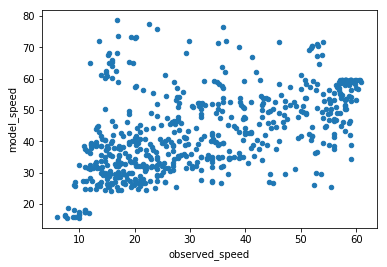

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

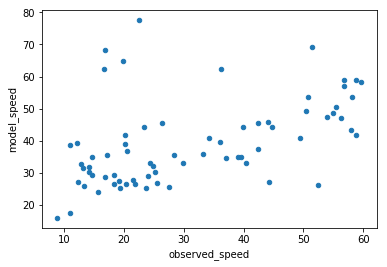

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,43,58
16,Everett to Seattle - SB,25,28
25,Tacoma to Seattle - NB,27,26
34,Seattle to Tacoma - SB,42,59
43,Bellevue to Lynnwood - NB,47,56
52,Lynnwood to Bellevue - SB,25,24
61,Tukwila to Bellevue - NB,27,19
70,Bellevue to Tukwila - SB,27,44
79,Auburn to Renton - NB,29,24
88,Renton to Auburn - SB,50,55


### PM Peak, Primary Corridors

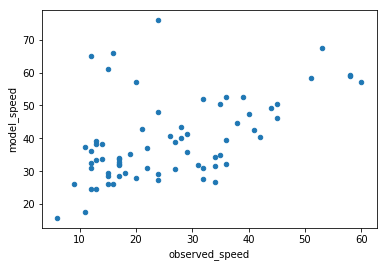

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,27,24
11,Everett to Seattle - SB,40,28
20,Tacoma to Seattle - NB,40,42
29,Seattle to Tacoma - SB,31,27
38,Bellevue to Lynnwood - NB,29,24
47,Lynnwood to Bellevue - SB,43,41
56,Tukwila to Bellevue - NB,28,32
65,Bellevue to Tukwila - SB,28,20
74,Auburn to Renton - NB,49,44
83,Renton to Auburn - SB,31,32
